In [298]:
import pandas as pd
import numpy as np

In [299]:
df=pd.read_csv("student_data.csv")
df

,srno,meritno,app_id,gender,category,marks
0,1,781.0,EN24139869,M,OPEN,99.68
1,2,4366.0,EN24207871,M,OPEN,98.50
2,3,4418.0,EN24284781,M,OPEN,98.49
3,4,5250.0,EN24159954,F,OPEN,98.22
4,5,5271.0,EN24268685,M,OPEN,98.21
...,...,...,...,...,...,...
199,5,5332.0,EN24128509,M,SEBC$,98.20
200,6,5365.0,EN24217401,M,OPEN,98.19
201,7,5384.0,EN24183146,M,OPEN,98.18
202,8,5568.0,EN24141703,M,OPEN,98.11


## First Year Student Data from Fr. Conceicao Rodriguez college of engineering
This Dataset has been extracted from PDF having data of admission of students into our college in Computer Engineering Branch FY2024-25. we have extracted data in Clg_List notebook using NLP and PDF processing using fitz and created this dataset.


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   srno      204 non-null    int64  
 1   meritno   204 non-null    float64
 2   app_id    204 non-null    object 
 3   gender    204 non-null    object 
 4   category  204 non-null    object 
 5   marks     204 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.7+ KB


## Plan of Action
- Data Cleaning
- Feature Engineering
- Exploratory Data Analysis
- Hypothesis Testing

#### Data Cleaning Steps
- handling duplicates
- handling missing values
- Cleaning Category Column Data

In [301]:
dup=df[df.duplicated()]
dup

,srno,meritno,app_id,gender,category,marks


In [302]:
missing=df.isna().sum().sort_values(ascending=False)
missing

srno        0
meritno     0
app_id      0
gender      0
category    0
marks       0
dtype: int64

### Feature Engineering


In [303]:
df

,srno,meritno,app_id,gender,category,marks
0,1,781.0,EN24139869,M,OPEN,99.68
1,2,4366.0,EN24207871,M,OPEN,98.50
2,3,4418.0,EN24284781,M,OPEN,98.49
3,4,5250.0,EN24159954,F,OPEN,98.22
4,5,5271.0,EN24268685,M,OPEN,98.21
...,...,...,...,...,...,...
199,5,5332.0,EN24128509,M,SEBC$,98.20
200,6,5365.0,EN24217401,M,OPEN,98.19
201,7,5384.0,EN24183146,M,OPEN,98.18
202,8,5568.0,EN24141703,M,OPEN,98.11


In [304]:
import re
df.category.value_counts()

category
OPEN         189
OPEN@          4
OBC            3
OBC$           2
SEBC$          2
Open/PH1       1
OBC#           1
SC             1
Open/DEF1      1
Name: count, dtype: int64

In [305]:
def category_cleaning(category):
    category_cleaned=re.sub(r'[@#$&!]', '', category)
    parts=category_cleaned.split('/')
    if len(parts)>1:
        if parts[1].startswith("PH"):
            return 'Physically handicapped'
        elif parts[1].startswith("DEF"):
            return 'Defence'
    else:
        return 'N'
    
def category_cleaning2(category):
    category_cleaned=re.sub(r'[@#$&!]', '', category)
    parts=category_cleaned.split('/')
    if len(parts)>1:
        return parts[0].upper()
    else:
        return category_cleaned.upper()
    
    
    
df['category2']=df['category'].apply(category_cleaning)
df['category']=df['category'].apply(category_cleaning2)
df = df[['srno', 'meritno', 'app_id', 'gender', 'category', 'category2', 'marks']]
df

,srno,meritno,app_id,gender,category,category2,marks
0,1,781.0,EN24139869,M,OPEN,N,99.68
1,2,4366.0,EN24207871,M,OPEN,N,98.50
2,3,4418.0,EN24284781,M,OPEN,N,98.49
3,4,5250.0,EN24159954,F,OPEN,N,98.22
4,5,5271.0,EN24268685,M,OPEN,N,98.21
...,...,...,...,...,...,...,...
199,5,5332.0,EN24128509,M,SEBC,N,98.20
200,6,5365.0,EN24217401,M,OPEN,N,98.19
201,7,5384.0,EN24183146,M,OPEN,N,98.18
202,8,5568.0,EN24141703,M,OPEN,N,98.11


In [306]:
df['category2'].value_counts()

category2
N                         202
Physically handicapped      1
Defence                     1
Name: count, dtype: int64

In [307]:
df=df[['meritno','gender','category','category2','marks']]
df

,meritno,gender,category,category2,marks
0,781.0,M,OPEN,N,99.68
1,4366.0,M,OPEN,N,98.50
2,4418.0,M,OPEN,N,98.49
3,5250.0,F,OPEN,N,98.22
4,5271.0,M,OPEN,N,98.21
...,...,...,...,...,...
199,5332.0,M,SEBC,N,98.20
200,5365.0,M,OPEN,N,98.19
201,5384.0,M,OPEN,N,98.18
202,5568.0,M,OPEN,N,98.11


In [308]:
df.gender=df.gender.replace({'F':0,'M':1})
df.category=df.category.replace({'OPEN':1, 'OBC':2, 'SEBC':3, 'SC':4})
df.category2=df.category2.replace({'N':1,'Physically handicapped':2, 'Defence':3})

C:\Users\Vansh\AppData\Local\Temp\ipykernel_5544\4210008221.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.gender=df.gender.replace({'F':0,'M':1})
C:\Users\Vansh\AppData\Local\Temp\ipykernel_5544\4210008221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gender=df.gender.replace({'F':0,'M':1})
C:\Users\Vansh\AppData\Local\Temp\ipykernel_5544\4210008221.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call 

In [309]:
df

,meritno,gender,category,category2,marks
0,781.0,1,1,1,99.68
1,4366.0,1,1,1,98.50
2,4418.0,1,1,1,98.49
3,5250.0,0,1,1,98.22
4,5271.0,1,1,1,98.21
...,...,...,...,...,...
199,5332.0,1,3,1,98.20
200,5365.0,1,1,1,98.19
201,5384.0,1,1,1,98.18
202,5568.0,1,1,1,98.11


### Explratory Data Analysis

Correlation Analysis

In [310]:
corr=df.corr()
corr

,meritno,gender,category,category2,marks
meritno,1.000000,-0.029207,-0.130097,0.010696,-0.983993
gender,-0.029207,1.000000,0.048573,-0.085964,0.018283
category,-0.130097,0.048573,1.000000,-0.018238,0.140424
category2,0.010696,-0.085964,-0.018238,1.000000,-0.006907
marks,-0.983993,0.018283,0.140424,-0.006907,1.000000


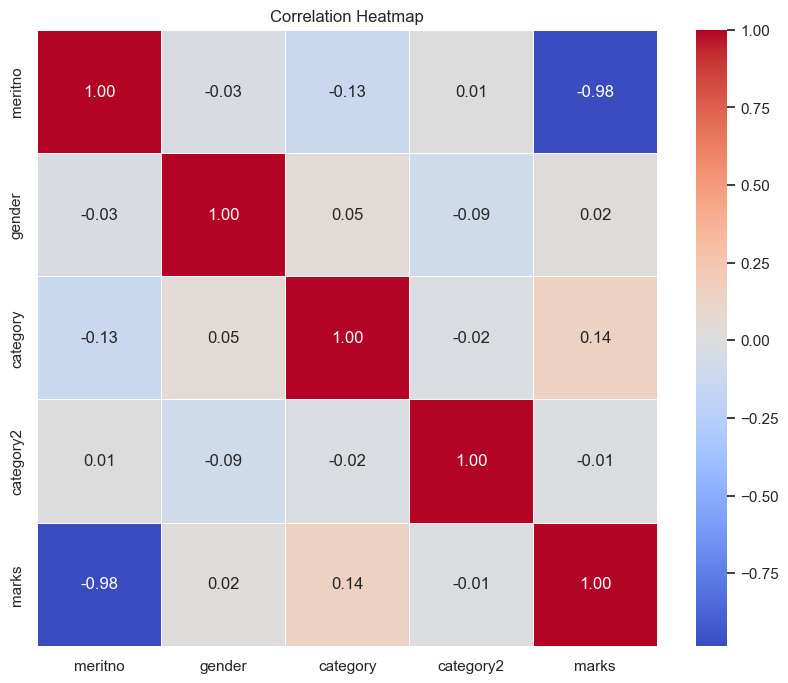

In [311]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Key Findings:
- findings

Admission Numbers by Category and Gender

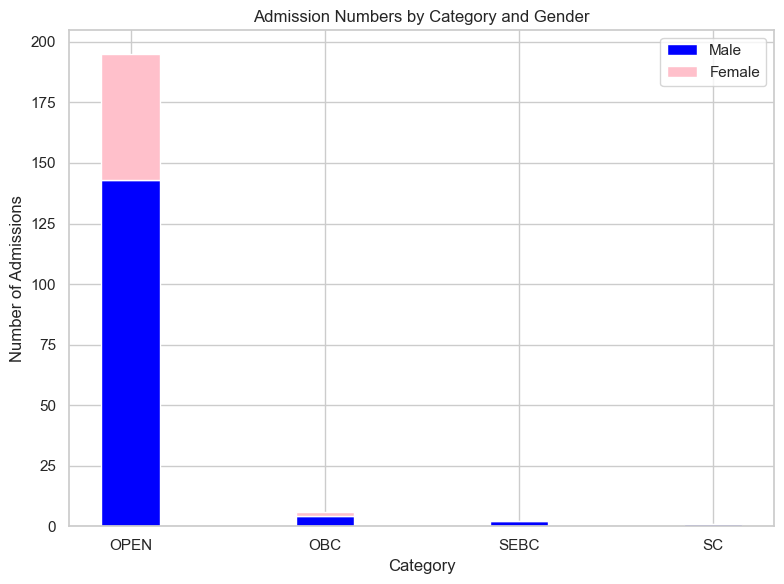

In [312]:
category_gender_counts = df.groupby(['category', 'gender']).size().unstack(fill_value=0)

# Plotting
categories = category_gender_counts.index
male_counts = category_gender_counts[1]
female_counts = category_gender_counts[0]

x = ['OPEN','OBC','SEBC','SC']
plt.figure(figsize=(8, 6))
width = 0.3

plt.bar(x, male_counts, width, label='Male', color='blue')
plt.bar(x, female_counts, width, bottom=male_counts, label='Female', color='pink')

plt.xlabel('Category')
plt.ylabel('Number of Admissions')
plt.title('Admission Numbers by Category and Gender')
plt.xticks(x)
plt.legend()

plt.tight_layout()
plt.show()

Key Findings
- Findings

Marks and Rank Distribution by Category

In [313]:
df.groupby('category').describe().marks

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
1,195.0,94.714718,3.718814,86.86,91.7850,95.930,97.9050,99.68
2,6.0,96.831667,2.981512,90.83,97.3525,97.970,98.3700,98.57
3,2.0,98.265000,0.091924,98.20,98.2325,98.265,98.2975,98.33
4,1.0,97.870000,NaN,97.87,97.8700,97.870,97.8700,97.87


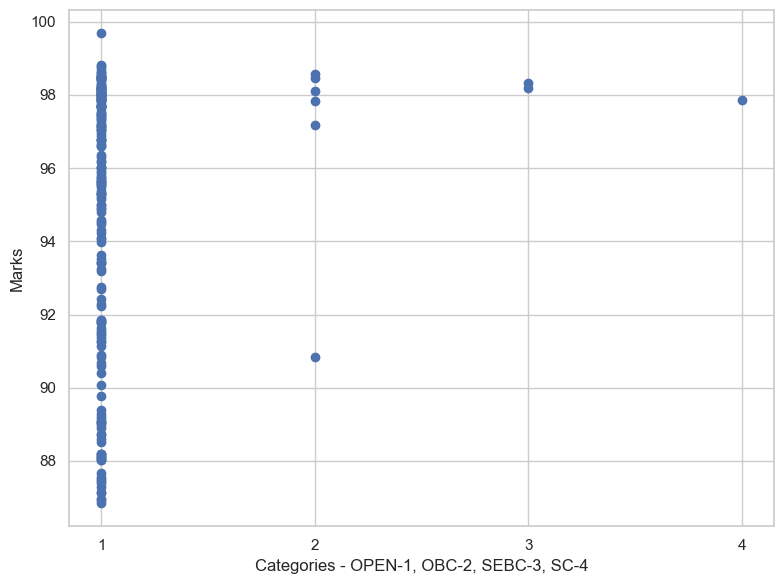

In [314]:
plt.figure(figsize=(8,6))
plt.scatter(df.category, df.marks)

plt.xticks([1,2,3,4])
plt.xlabel("Categories - OPEN-1, OBC-2, SEBC-3, SC-4")
plt.ylabel("Marks")
plt.tight_layout()
plt.show()


In [315]:
df.groupby('category').describe().meritno

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
1,195.0,15242.794872,11316.486273,781.0,5839.50,10964.0,24605.00,38476.0
2,6.0,9408.666667,8894.316492,4160.0,4788.50,6024.5,7936.25,27293.0
3,2.0,5099.500000,328.804653,4867.0,4983.25,5099.5,5215.75,5332.0
4,1.0,6331.000000,NaN,6331.0,6331.00,6331.0,6331.00,6331.0


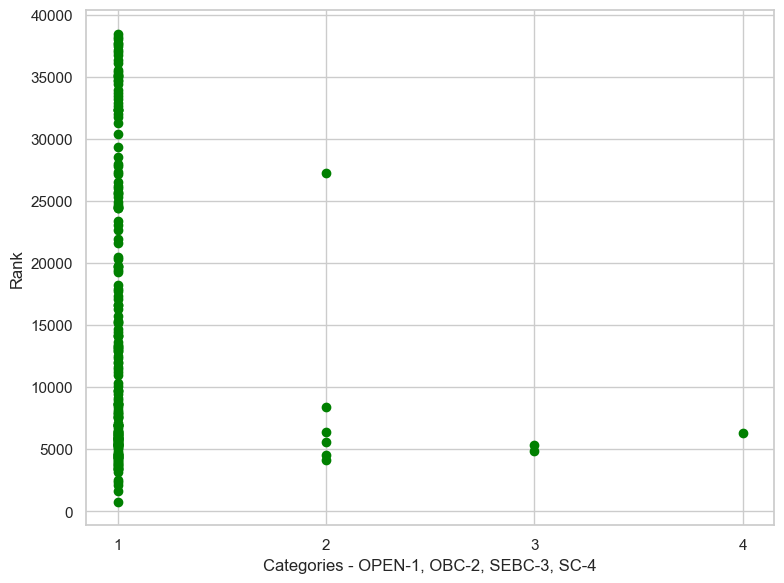

In [316]:
plt.figure(figsize=(8,6))
plt.scatter(df.category, df.meritno, color='green')

plt.xticks([1,2,3,4])
plt.xlabel("Categories - OPEN-1, OBC-2, SEBC-3, SC-4")
plt.ylabel("Rank")
plt.tight_layout()
plt.show()


Key Findings:
- findings

Marks and Rank Distribution by Gender

In [317]:
df.groupby('gender').describe().marks

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,54.0,94.71463,3.482023,86.94,92.085,95.825,97.4275,98.79
1,150.0,94.86780,3.792730,86.86,91.790,96.185,98.0725,99.68


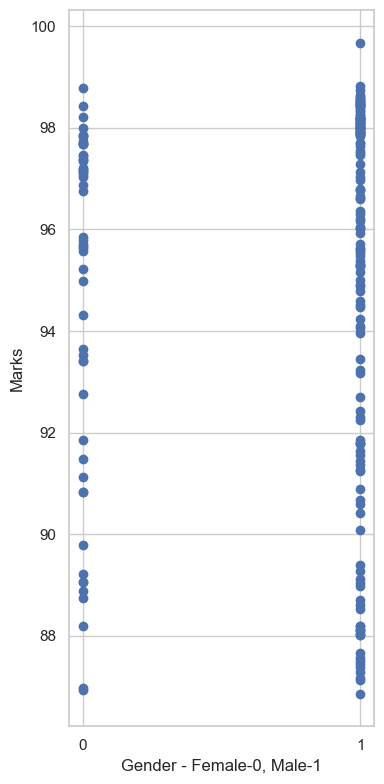

In [318]:
plt.figure(figsize=(4,8))
plt.scatter(df.gender, df.marks)

plt.xticks([0,1])
plt.xlabel("Gender - Female-0, Male-1")
plt.ylabel("Marks")
plt.tight_layout()
plt.show()

In [319]:
df.groupby('gender').describe().meritno

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,54.0,15474.537037,10504.820377,2111.0,7160.0,11142.5,23733.75,38222.0
1,150.0,14731.346667,11538.819688,781.0,5395.0,9701.5,24536.75,38476.0


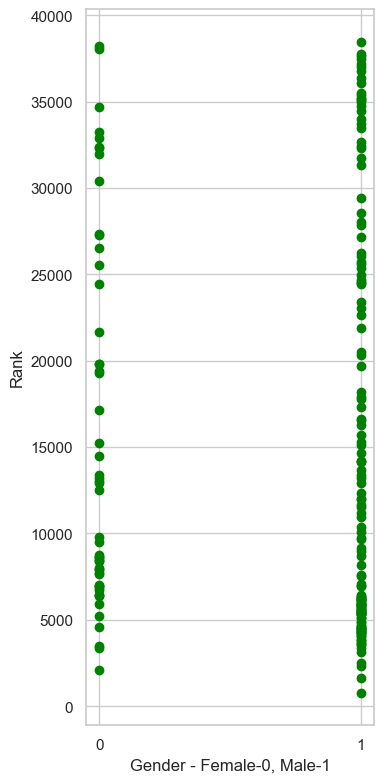

In [320]:
plt.figure(figsize=(4,8))
plt.scatter(df.gender, df.meritno, color="green")

plt.xticks([0,1])
plt.xlabel("Gender - Female-0, Male-1")
plt.ylabel("Rank")
plt.tight_layout()
plt.show()

Key Findings
- findings

Outlier Analysis

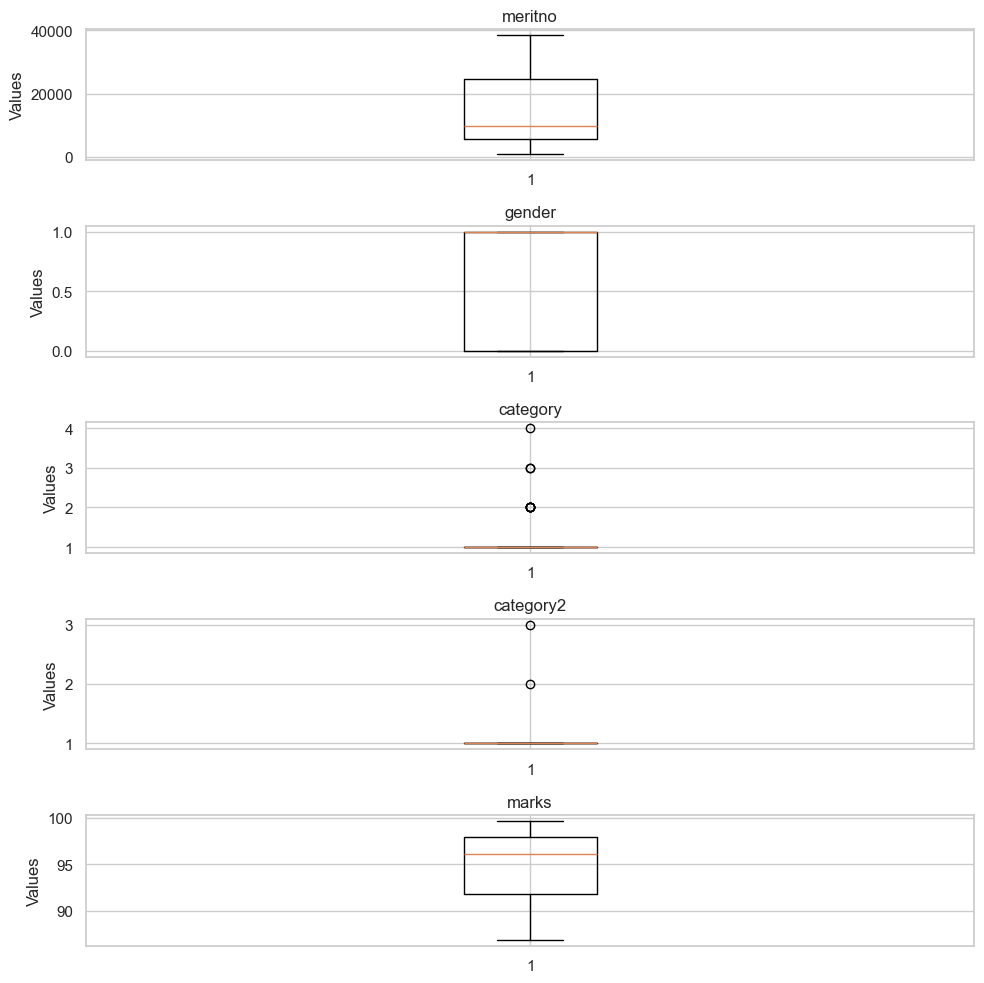

In [324]:
num_features = len(df.columns)

# Create a figure and axes array
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 2 * num_features))

# Plot each feature in a separate subplot
for i, column in enumerate(df.columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)
    axes[i].set_ylabel("Values")
    axes[i].set_xlabel("")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Key Findings
- findings

### Hypothesis Testing

1.) Hypothesis A

2.) Hypothesis B

3.) Hypothesis C